## Importing Pandas Library and Data Set

In [57]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

### Directory of Iris Data Set

In [58]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

### Types of Variable or attributes in the data

In [59]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Create DataFrame of Iris data set

In [60]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Have a look at the first few rows of the data frame -- Create a target column with target values

In [61]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Exploring names of target values 

In [62]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [64]:
df[df.target ==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


### 0,1,2 Do not tell us the names of flowers -- Hence create a columne that defines flower names for values in target variable

In [66]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [67]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [68]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


### Calling matplotlib for visualization

In [69]:
from matplotlib import pyplot as plt

In [70]:
%matplotlib inline

### Creating a dataset separated by flowernames for visualization

In [71]:
df0 = df[df.target ==0]

In [72]:
df1 = df[df.target==1]
df2 = df[df.target==2]

In [73]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


### Scatterplot to understand the distribution of variables to understand the linearity

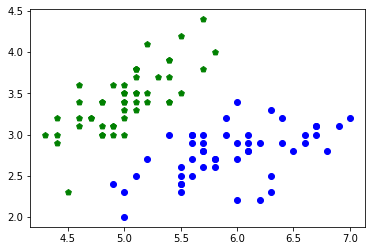

In [74]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = 'p')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue',marker = 'o' )

### To run model, split train and test data

In [75]:
from sklearn.model_selection import train_test_split

### Drop target and flower name -- not from original dataset but by creating and storing it in new variable

In [76]:
X = df.drop(['target', 'flower_name'], axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### A variable y will store target column

In [77]:
y=df.target

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [79]:
len(X_train)

120

In [80]:
len(X_test)

30

### From sklearn lib call Support vector Machine model --- Change parameters for tuning model for high score

In [87]:
from sklearn.svm import SVC
model = SVC(C=10, gamma = 50, kernel = 'poly') #Shift tab will help you change the parameters - you can also use 'linear' or 'sigmoid' function for kernel

In [88]:
model.fit(X_train, y_train)

SVC(C=10, gamma=50, kernel='poly')

In [89]:
model.score(X_test, y_test)

0.9333333333333333

### Final Score can change based on the parameter values. In this we have achieved a score of 93.3%